In [21]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: transformers in c:\users\akhil\.conda\envs\condaenv\lib\site-packages (4.46.3)




[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
pip install --upgrade tensorflow transformers torch


     ---------------------------------------- 0.0/43.5 kB ? eta -:--:--
     ----------------- -------------------- 20.5/43.5 kB 330.3 kB/s eta 0:00:01
     -------------------------------------- 43.5/43.5 kB 426.9 kB/s eta 0:00:00
  Using cached sympy-1.13.1-py3-none-any.whl.metadata (12 kB)
   ---------------------------------------- 0.0/10.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.1 MB 1.6 MB/s eta 0:00:07
    --------------------------------------- 0.2/10.1 MB 1.8 MB/s eta 0:00:06
   - -------------------------------------- 0.3/10.1 MB 2.5 MB/s eta 0:00:04
   -- ------------------------------------- 0.6/10.1 MB 3.7 MB/s eta 0:00:03
   --- ------------------------------------ 1.0/10.1 MB 4.4 MB/s eta 0:00:03
   ----- ---------------------------------- 1.3/10.1 MB 5.0 MB/s eta 0:00:02
   ------ --------------------------------- 1.7/10.1 MB 5.4 MB/s eta 0:00:02
   ------- -------------------------------- 2.0/10.1 MB 5.4 MB/s eta 0:00:02
   --------- -------

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.0.2 requires torch==2.0.1, but you have torch 2.5.1 which is incompatible.

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
from transformers import pipeline
import tensorflow as tf
import torch
print("PyTorch installed:", torch.__version__)
print("TensorFlow installed:", tf.__version__)

finbert = pipeline('sentiment-analysis', model='yiyanghkust/finbert-tone')

PyTorch installed: 2.5.1+cpu
TensorFlow installed: 2.18.0



Device set to use cpu


In [2]:
import pandas as pd
from transformers import pipeline

# Step 1: Load the existing CSV file
csv_file = "AAPL_reddit_stock_headlines_with_movement.csv"  # Replace with the actual filename
df = pd.read_csv(csv_file)

# Step 2: Perform sentiment analysis on the 'Headline' column


# Ensure 'Headline' column is not empty before analyzing
df['Sentiment'] = df['Headlines'].apply(
    lambda x: finbert(x)[0]['score'] if pd.notnull(x) and x.strip() else 0
)

# Step 3: Save the updated dataframe back to a new CSV file
updated_csv_file = "apple_stock_reddit_with_sentiment.csv"
df.to_csv(updated_csv_file, index=False)

print(f"Updated CSV file saved as: {updated_csv_file}")

Updated CSV file saved as: apple_stock_reddit_with_sentiment.csv


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from textblob import TextBlob

# Load your processed data
data = pd.read_csv('apple_stock_reddit_with_sentiment.csv')
data['sentiment_polarity'] = data['Headlines'].apply(lambda x: TextBlob(x).sentiment.polarity)
# Define stock-related keywords
#stock_keywords = ['AAPL']

# Count mentions of each keyword

data['mentions_AAPL'] = data['Headlines'].str.count('AAPL')
    
# Calculate short-term (3-day) and long-term (7-day) sentiment moving averages
data['sentiment_3day_avg'] = data['Sentiment'].rolling(window=3).mean()
data['sentiment_7day_avg'] = data['Sentiment'].rolling(window=7).mean()

# Check for null values and preprocess
data.dropna(inplace=True)
print(data.shape)
# Removing punctuations

data['Headlines']=data['Headlines'].replace("[^a-zA-Z]"," ",regex=True)

# Separate features and labels



(341, 10)


In [25]:
import re
import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Download required NLTK resources
nltk.download('punkt_tab')  # Ensure punkt is downloaded
nltk.download('stopwords')  # Ensure stopwords is downloaded

# Initialize stemmer and lemmatizer
ps = PorterStemmer()
wordnet = WordNetLemmatizer()

# Assuming you have a DataFrame `data`
# df = ...
df = data.copy()  # Make sure 'data' is your DataFrame

# Tokenize sentences in the 'Headlines' column
df['Tokenized_Headlines'] = df['Headlines'].apply(nltk.sent_tokenize)
# Check column existence
print(df.columns)  # Verify column names

# Check the first few rows of the DataFrame
print(df.head())


# Print the tokenized sentences to check the format
print(df['Tokenized_Headlines'].iloc[1])  # Print the first few rows to verify

# List to store the cleaned text
corpus = []

# Load stopwords once outside the loop
stop_words = set(stopwords.words('english'))

# Loop through the sentences in each row of the dfFrame
for i in range(len(df)):
    review = ''
    
    # Iterate through sentences for each row
    for sentence in df['Tokenized_Headlines'].iloc[i]:
        # Remove non-alphabetic characters
        sentence = re.sub('[^a-zA-Z]', ' ', sentence)
        sentence = sentence.lower().split()
        
        # Remove stopwords and apply stemming
        sentence = [wordnet.lemmatize(word) for word in sentence if word not in stop_words]
        
        # Join words to form the cleaned sentence
        review += ' '.join(sentence) + ' '
    
    # Add the cleaned sentence to the corpus
    corpus.append(review)

df['corpus'] = corpus
# Display the cleaned corpus
print(len(corpus))
# Display the cleaned corpus

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\akhil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akhil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Index(['Date', 'Headlines', 'Open', 'Close', 'Movement', 'Sentiment',
       'sentiment_polarity', 'mentions_AAPL', 'sentiment_3day_avg',
       'sentiment_7day_avg', 'Tokenized_Headlines'],
      dtype='object')
          Date                                          Headlines       Open  \
6   2011-09-12  Who s stock wins with the impending iPhone rel...  11.237252   
7   2011-09-26  How do you guys feel about AAPL  Apple s stock...  12.046458   
8   2011-10-18                       AAPL miss  stock down     AH  12.706229   
9   2011-10-25  Reddistors  please educate me on the stock mar...  12.202212   
10  2012-02-10  If you could trade only   stocks in March  wha...  14.790999   

        Close  Movement  Sentiment  sentiment_polarity  mentions_AAPL  \
6   11.446331         1   0.999988            0.300000              0   
7   12.146177         1   0.996824            0.000000              1   
8   12.720690         1   0.999948           -0.155556              1   
9   11.983492 

In [26]:
train = df[df['Date'] < '20220101']
test = df[df['Date'] > '20211231']
print(test.shape,train.shape)

(123, 12) (270, 12)


In [27]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

In [28]:
## implement BAG OF WORDS
Tfidvector=TfidfVectorizer(max_features=500,stop_words='english')
traindataset=Tfidvector.fit_transform(train['corpus'])
testdataset=Tfidvector.fit_transform(test['corpus'])
print(traindataset.shape,testdataset.shape)

(270, 500) (123, 500)


In [29]:
df.head()

,Date,Headlines,Open,Close,Movement,Sentiment,sentiment_polarity,mentions_AAPL,sentiment_3day_avg,sentiment_7day_avg,Tokenized_Headlines,corpus
6,2011-09-12,Who s stock wins with the impending iPhone rel...,11.237252,11.446331,1,0.999988,0.300000,0,0.839222,0.929431,[Who s stock wins with the impending iPhone re...,stock win impending iphone release
7,2011-09-26,How do you guys feel about AAPL Apple s stock...,12.046458,12.146177,1,0.996824,0.000000,1,0.998937,0.928981,[How do you guys feel about AAPL Apple s stoc...,guy feel aapl apple stock going keep bull seem...
8,2011-10-18,AAPL miss stock down AH,12.706229,12.720690,1,0.999948,-0.155556,1,0.998920,0.930631,[AAPL miss stock down AH],aapl miss stock ah
9,2011-10-25,Reddistors please educate me on the stock mar...,12.202212,11.983492,0,0.998104,0.000000,0,0.998292,0.930361,[Reddistors please educate me on the stock ma...,reddistors please educate stock market share e...
10,2012-02-10,If you could trade only stocks in March wha...,14.790999,14.865109,1,0.999953,0.000000,0,0.999335,0.930357,[If you could trade only stocks in March wh...,could trade stock march would


In [46]:
import numpy as np

def get_combined_features(dframe,Tfidvector=None):
    Tfidvector=TfidfVectorizer(max_features=500,ngram_range=(2,2))
    dataset_NA=Tfidvector.fit_transform(dframe['Headlines']).toarray()
    print(dataset_NA.shape)
    # Combine numerical and textual features
    combined_features = np.hstack([dframe[['sentiment_3day_avg', 'sentiment_7day_avg']].fillna(0).values, dataset_NA])
    return combined_features

traindataset=get_combined_features(train)
testdataset=get_combined_features(test)
print(test.shape,train.shape,testdataset.shape)

(270, 500)
(123, 500)
(123, 15) (270, 15) (123, 502)


In [47]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Train the Random Forest classifier
random_classifier = RandomForestClassifier(n_estimators=200, criterion='gini',max_depth=55, random_state=42)
random_classifier.fit(traindataset, train['Movement'])
predictions = random_classifier.predict(testdataset)

In [48]:
matrix=confusion_matrix(test['Movement'],predictions)
print(matrix)
score=accuracy_score(test['Movement'],predictions)
print(score)
report=classification_report(test['Movement'],predictions)
print(report)

[[33 22]
 [26 42]]
0.6097560975609756
              precision    recall  f1-score   support

           0       0.56      0.60      0.58        55
           1       0.66      0.62      0.64        68

    accuracy                           0.61       123
   macro avg       0.61      0.61      0.61       123
weighted avg       0.61      0.61      0.61       123



In [4]:
pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   -------- ------------------------------ 61.4/294.9 kB 656.4 kB/s eta 0:00:01
   ---------------- ----------------------- 122.9/294.9 kB 1.0 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


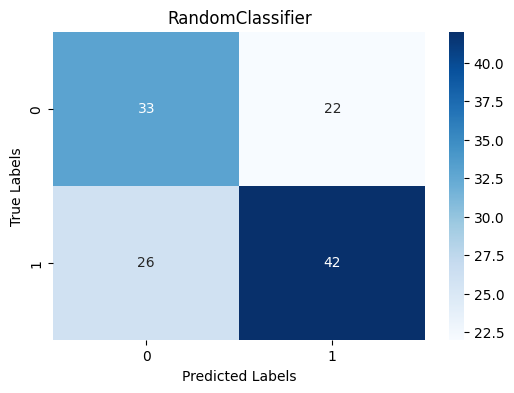

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('RandomClassifier')
plt.show()

In [50]:

from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Ensure required NLTK resources are downloaded
nltk.download('vader_lexicon')

# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Feature engineering for text
def extract_vader_scores(text):
    scores = sia.polarity_scores(text)
    return scores['neg'], scores['neu'], scores['pos'], scores['compound']

# Apply VADER to Extract Sentiment Features
data[['neg', 'neu', 'pos', 'compound']] = data['Headlines'].apply(
    lambda x: pd.Series(extract_vader_scores(x))
)

# Display the updated DataFrame
print("Data with Sentiment Scores:\n", data)

Data with Sentiment Scores:
            Date                                          Headlines  \
6    2011-09-12  Who s stock wins with the impending iPhone rel...   
7    2011-09-26  How do you guys feel about AAPL  Apple s stock...   
8    2011-10-18                       AAPL miss  stock down     AH   
9    2011-10-25  Reddistors  please educate me on the stock mar...   
10   2012-02-10  If you could trade only   stocks in March  wha...   
..          ...                                                ...   
433  2024-10-04          I lost               in the stock market    
435  2024-10-15  Trump Media shares halted after sudden DJT sto...   
437  2024-10-29  This market stuff is pretty easy just be a gam...   
439  2024-11-06  Private prison stocks booming in the wake of t...   
440  2024-11-18  Tesla stock pops    in premarket after report ...   

           Open       Close  Movement  Sentiment  sentiment_polarity  \
6     11.237252   11.446331         1   0.999988          

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\akhil\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [52]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from scipy.sparse import hstack  # For combining sparse matrices
import numpy as np


# Initialize NLTK tools
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
wordnet = WordNetLemmatizer()


# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

np.random.seed(42)

# Clean the text and compute sentiment scores
def preprocess_and_analyze(row):
    # Text preprocessing
    corpus = []
    sentences = nltk.sent_tokenize(row['Headlines'])
    for sentence in sentences:
        sentence = re.sub('[^a-zA-Z]', ' ', sentence).lower().split()
        sentence = [wordnet.lemmatize(word) for word in sentence if word not in stop_words]
        corpus.append(' '.join(sentence))
    cleaned_text = ' '.join(corpus)
    row['corpus'] = cleaned_text
   
    # VADER sentiment analysis
    sentiment = analyzer.polarity_scores(cleaned_text)
    row['pos'] = sentiment['pos']
    row['neg'] = sentiment['neg']
    row['neu'] = sentiment['neu']
    row['compound'] = sentiment['compound']
    return row


# Apply preprocessing and sentiment analysis to the dataset
df = data.apply(preprocess_and_analyze, axis=1)


# Split the dataset into training and testing sets
train = df[df['Date'] < '20220101']
test = df[df['Date'] > '20211231']


# Extract TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=500, stop_words='english')
train_tfidf = tfidf_vectorizer.fit_transform(train['corpus'])
test_tfidf = tfidf_vectorizer.transform(test['corpus'])


# Extract VADER sentiment features
train_vader = train[['pos', 'neg', 'neu', 'compound']].values
test_vader = test[['pos', 'neg', 'neu', 'compound']].values


# Combine TF-IDF and VADER features
from scipy.sparse import hstack
train_combined = hstack([train_tfidf, train_vader])
test_combined = hstack([test_tfidf, test_vader])


# Train the Random Forest classifier
random_classifier = RandomForestClassifier(n_estimators=200, criterion='gini',max_depth=55, random_state=42)
random_classifier.fit(train_combined, train['Movement'])


# Make predictions and evaluate the model
predictions = random_classifier.predict(test_combined)


# Compute metrics
matrix = confusion_matrix(test['Movement'], predictions)
score = accuracy_score(test['Movement'], predictions)
report = classification_report(test['Movement'], predictions)


# Print results
print("Confusion Matrix:")
print(matrix)
print("Accuracy Score:", score)
print("Classification Report:")
print(report)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akhil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Confusion Matrix:
[[46  9]
 [23 45]]
Accuracy Score: 0.7398373983739838
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.84      0.74        55
           1       0.83      0.66      0.74        68

    accuracy                           0.74       123
   macro avg       0.75      0.75      0.74       123
weighted avg       0.76      0.74      0.74       123



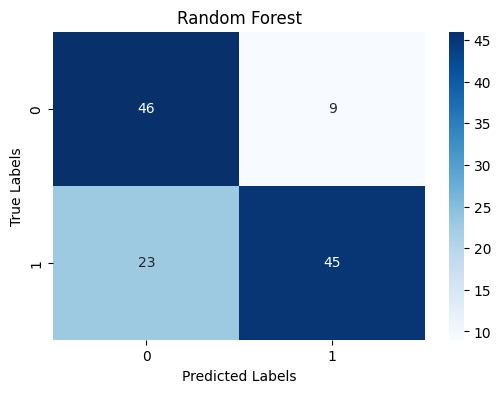

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Random Forest')
plt.show()

In [54]:
from sklearn.metrics import accuracy_score

In [55]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', max_iter=1000)
model.fit(train_combined, train['Movement'])
predict_linear_tr=model.predict(train_combined)
predict_linear=model.predict(test_combined)

print(accuracy_score(test['Movement'], predict_linear))
print(accuracy_score(train['Movement'], predict_linear_tr))
# Confusion Matrix
matrix = confusion_matrix(test['Movement'], predict_linear)
print("Confusion Matrix:\n", matrix)

# Classification Report
report = classification_report(test['Movement'], predict_linear)
print("Classification Report:\n", report)


0.6422764227642277
0.8851851851851852
Confusion Matrix:
 [[45 10]
 [34 34]]
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.82      0.67        55
           1       0.77      0.50      0.61        68

    accuracy                           0.64       123
   macro avg       0.67      0.66      0.64       123
weighted avg       0.68      0.64      0.64       123



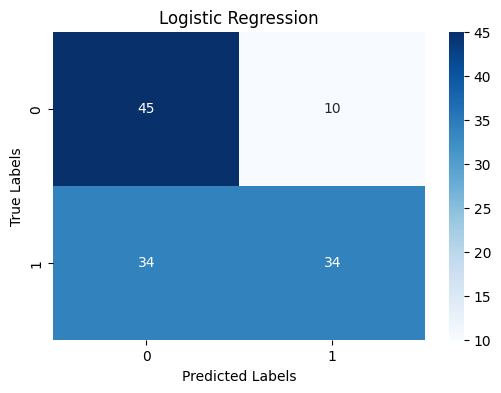

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Logistic Regression')
plt.show()

In [66]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Train the XGBoost Model
model = xgb.XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1)
model.fit(train_combined, train['Movement'])

# Predictions
predictions = model.predict(test_combined)

# Accuracy
accuracy = accuracy_score(test['Movement'], predictions)
print("XGBoost Accuracy:", accuracy)

# Confusion Matrix
matrix = confusion_matrix(test['Movement'], predictions)
print("Confusion Matrix:\n", matrix)

# Classification Report
report = classification_report(test['Movement'], predictions)
print("Classification Report:\n", report)









XGBoost Accuracy: 0.7398373983739838
Confusion Matrix:
 [[44 11]
 [21 47]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.80      0.73        55
           1       0.81      0.69      0.75        68

    accuracy                           0.74       123
   macro avg       0.74      0.75      0.74       123
weighted avg       0.75      0.74      0.74       123



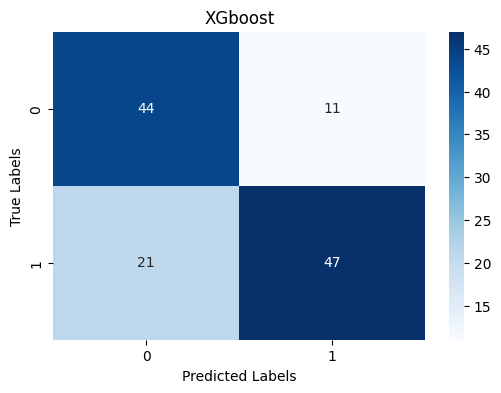

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('XGboost')
plt.show()

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the model
random_classifier = RandomForestClassifier(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [5, 10, 20],  # Max depth of trees (regularization)
    'min_samples_split': [2, 10, 20],  # Minimum samples to split nodes
    'min_samples_leaf': [1, 5, 10],  # Minimum samples in leaf nodes
    'max_features': ['sqrt', 'log2']  # Number of features to consider per split
}

# Set up GridSearchCV to search over the hyperparameter space
grid_search = GridSearchCV(estimator=random_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model with the best parameters
grid_search.fit(train_combined, train['Movement'])

# Print the best parameters and the corresponding score
print("Best parameters:", grid_search.best_params_)



Best parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
